# Module 1 - Basic Summations and Cancelation Errors

## Goals
* Write a set of functions that calculate commonly used mathematical expressions ($e^x$ and $\pi$) using basic python constructs
* Learn about convergence and cancellation errors

## Tools we need
* Python for loops and if statemets
* Python functions
* Numpy (arange, exp, and sin) and matplotlib (plot) for comparison

## How do we tell python to calculate $e^x$ ?

Recursive algorithm using Taylor sum:

\begin{align}
e^x &= 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots \\
    &= \sum_{n=0}^{\infty}\frac{x^n}{n!}
\end{align}

In [1]:
# First attempt
from math import factorial          # import the factorial function from the built-in python math module 
N = 100                             # Number of terms in the summation
sum = 1.0                           # Initial value of the summation, n=0 term
x = 1.0                             # exponent
for n in range(1,N):                # for loop that iterates over the values from 1 to N
    sum = sum + x**n/factorial(n)
print(sum)

2.7182818284590455


In [2]:
# Simplify and turn it into a function
def myexp(x):
    N = 100
    sum = 1
    nterm = 1
    for n in range(1,N):
        nterm *= x/n
        sum += nterm
    return sum
print(myexp(1.0))

2.7182818284590455


### Let's compare our function with python's built-in function

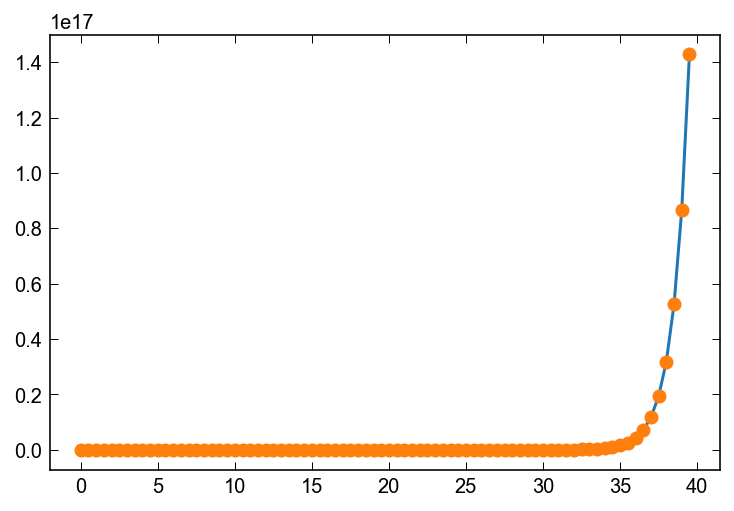

In [3]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

x = np.arange(0,40,0.5)        # Create a numpy array of values from 0 to 40 in increments of 0.1 for plotting
plt.plot(x, myexp(x))
plt.plot(x, np.exp(x), 'o')

### How quickly does the function converge to a reasonable value?

In [4]:
# let's redefine our function using an additional parameter for the number of terms in the summation
def myexp(x, N = 100):       # we can set the default values of input parameters that may be optional
    sum = 1
    nterm = 1
    for n in range(1,N):
        nterm *= x/n
        sum += nterm
    return sum
print(myexp(1.0))
print(myexp(1.0, 10))
print(myexp(1.0, 2))

2.7182818284590455
2.7182815255731922
2.0


We can explore the convergence more thoroughly with a plot:

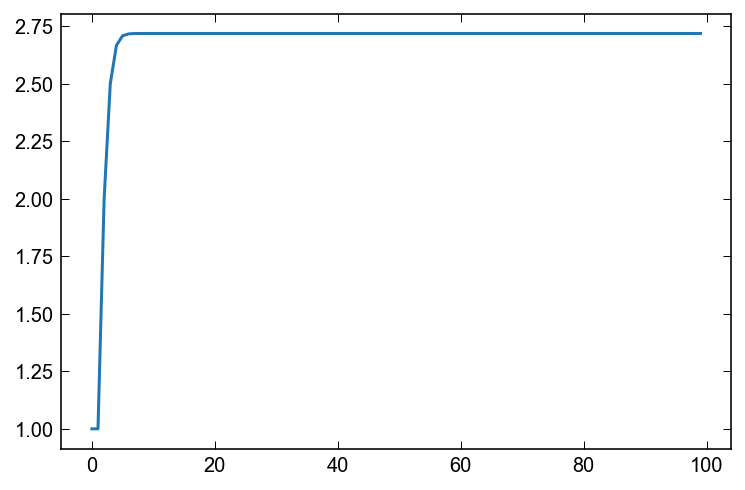

In [5]:
N = np.arange(100)             
approx_exp = np.zeros(100)      # Create an empty (all values set to zero) 1D numpy array with 100 elements
x = 1.0
for n in N:
    approx_exp[n] = myexp(x, n)

plt.figure()
plt.plot(N, approx_exp)

### What about negative exponents, $e^{-x}$?

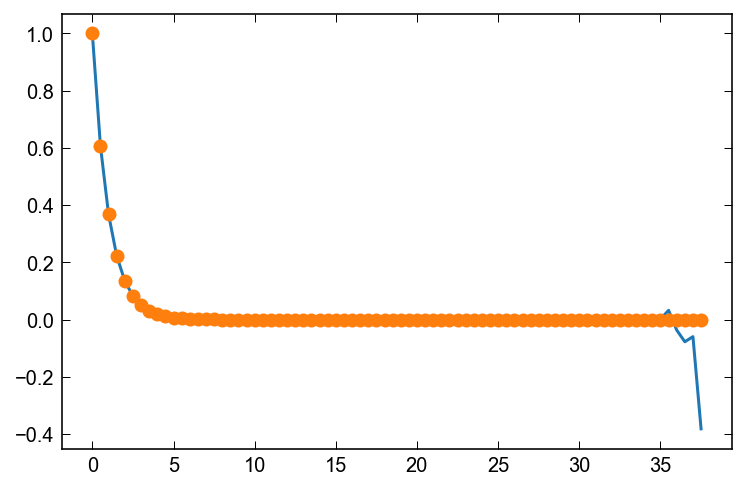

In [6]:
x = np.arange(0,38,0.5)        # Create a numpy array of values from 0 to 40 in increments of 0.1 for plotting
plt.figure()                   # Create a new plot. If we ommit this, the new lines will be added to the prev. plot
plt.plot(x, myexp(-x))
plt.plot(x, np.exp(-x), 'o')

#### Why does our $e^{-x}$ function fail for large values of $x$?

The Taylor sum for $e^{-x}$ has terms with alternating sign

\begin{equation}
e^{-x} = 1 - x + \frac{x^2}{2!} - \frac{x^3}{3!} + \frac{x^4}{4!} \dots \\
\end{equation}

When calculating $e^{-x}$ for large $x$, we have very large terms that sum up to a very small number. At some point the sum runs into the limits of the fixed precission numbers, which results in a **subtractive cancellation** error. How can we correct this?

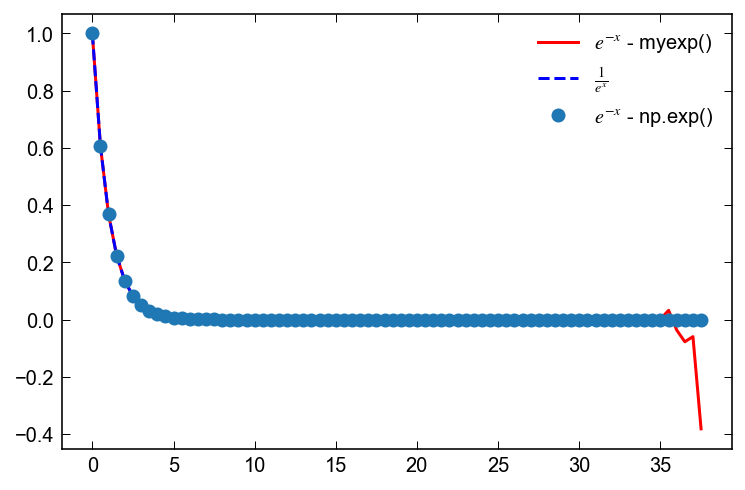

In [7]:
# Use 1/e^x instead!
x = np.arange(0,38,0.5)
plt.figure()
plt.plot(x, myexp(-x), 'r-', label=r'$e^{-x}$ - myexp()')
plt.plot(x, 1.0/myexp(x), 'b--', label=r'$\frac{1}{e^x}$')
plt.plot(x, np.exp(-x), 'o', label=r'$e^{-x}$ - np.exp()')
plt.legend()

## Computing $\pi$

We can use a recursive algorithm with a finite sum just as we did for computing $e^x$. There are two well known formulas for this:

**Leibniz accelerated summation**

\begin{equation}
\pi = 4 \sum_{n=1}^\infty \frac{(-1)^{n+1}}{2n-1}
\end{equation}

Gottfried Wilhelm Leibniz 1646-1716
<img src="http://upload.wikimedia.org/wikipedia/commons/6/6a/Gottfried_Wilhelm_von_Leibniz.jpg" width=150px>

**Sharp summation**

\begin{equation}
\pi = \sum_{n=0}^\infty \frac{2(-1)^{n}3^{1/2-n}}{2n+1}
\end{equation}

Abraham Sharp 1653-1742
<img src="http://upload.wikimedia.org/wikipedia/commons/4/43/Sharp_Abraham.jpg" width=150px>


In [8]:
def leibniz(N):
    '''Compute pi via an accelerated Leibniz summation.'''    # String text shown when using help(function)
    lpi = 0.0
    for n in range(1,N):
        if (n % 2):
            sign = 1
        else:
            sign = -1
        lpi += 1.0*sign/(2*n-1)
    return 4.0*lpi

def sharp(N):
    '''Compute pi via the Sharp summation.'''
    spi = 0.0
    for n in range(N):
        if (n % 2):
            sign = -1
        else:
            sign = 1
        num = 2*sign*3**(0.5-n)
        denom = 2*n+1
        spi += num/denom
    return spi

In [9]:
help(leibniz)
help(sharp)

Help on function leibniz in module __main__:

leibniz(N)
    Compute pi via an accelerated Leibniz summation.

Help on function sharp in module __main__:

sharp(N)
    Compute pi via the Sharp summation.



In [10]:
print(leibniz(100))
print(sharp(100))

3.1516934060711166
3.1415926535897936


### How quickly do these approximations converge to the exact value?

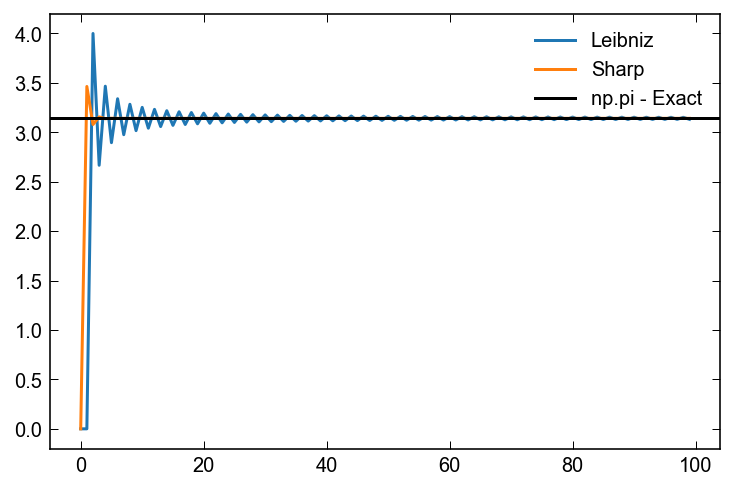

In [11]:
terms = 100
N = np.arange(terms)             
lpi = np.zeros(terms)
spi = np.zeros(terms)

for n in N:
    lpi[n] = leibniz(n)
    spi[n] = sharp(n)

plt.figure()
plt.plot(N, lpi, label = 'Leibniz')
plt.plot(N, spi, label = 'Sharp')
plt.axhline(y=np.pi, color='k', label = 'np.pi - Exact')
plt.legend()